# 1. Introduction
**Dataset**: The dataset used for this project is the "Churn Modelling" dataset, which contains customer information from a bank. The target variable is Exited, indicating whether a customer has left the bank (1) or stayed (0).

**Objective**: Build a predictive model to classify customers based on their likelihood of churning and achieve the highest possible accuracy.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction-dataset/Churn_Modelling.csv


# 2. Importing Libraries

* Imported NumPy and Pandas for data handling and preprocessing.
* Visualization libraries include Matplotlib, Seaborn (for static visualizations), and Plotly (for interactive visuals). 

In [2]:
#Importing libraries

#Basic libraries
import numpy as np
import pandas as pd

#for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 3. Loading the Dataset

In [3]:
#Loading the dataset
customer_churn_file_path='/kaggle/input/bank-customer-churn-prediction-dataset/Churn_Modelling.csv'
churn_data=pd.read_csv(customer_churn_file_path)
churn_data.shape

(10000, 14)

   * The dataset has 10,000 rows and 14 columns.
   * Each row represents an individual customer with features such as CreditScore, Geography, Gender, Age, etc., and the target column Exited. 

# 4.1 Previewing the Data
* The .head() method shows the first 5 rows of the dataset, giving us a quick look at the structure of the data.
* The .tail() method shows the last 5 rows, ensuring there are no unexpected formatting or structural issues.

In [4]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
churn_data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


# 4.2 Dataset Information

In [6]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* The dataset contains 14 columns and 10,000 rows.
* Columns such as RowNumber, CustomerId, and Surname are identifiers and likely not relevant for prediction.
* There are no missing values, as all columns show a complete count of 10,000 non-null entries.
* The dataset includes both numerical (e.g., CreditScore, Balance) and categorical (e.g., Geography, Gender) features.

In [7]:
churn_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

NOTE: Confirmation there are no empty cells in the spreadsheet or dataset

# 5. Preprocessing the Data

**5.1 Dropping Unnecessary Columns**

In [8]:
df = churn_data.drop(labels = ['RowNumber', 'CustomerId', 'Surname'], axis = 1)

The columns RowNumber, CustomerId, and Surname are dropped because they are identifiers and do not contribute to predictive power.

**5.2 Identifying Numerical Columns**

In [9]:
numeric_cols = df.select_dtypes(include = 'number').columns
print(numeric_cols)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


Extracts all numerical columns for further analysis, ensuring non-numeric columns are handled separately during preprocessing.

**5.3 Correlation Analysis**
Heatmap Visualization

<Axes: >

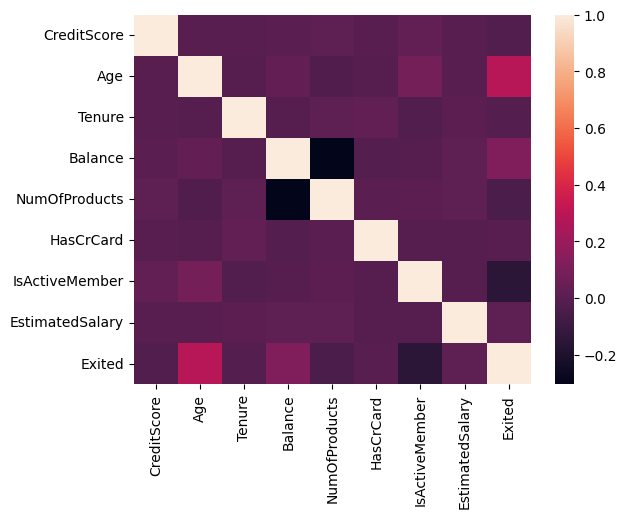

In [10]:
sns.heatmap(df[numeric_cols].corr())

A heatmap shows the correlation coefficients between numerical features.
Key Observations:
* Age and Exited show a positive correlation (~0.28). This suggests older customers are more likely to churn.
* Balance also has some correlation with Exited (~0.12), while EstimatedSalary shows almost no correlation.

In [11]:
df[numeric_cols].corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


Provides a tabular view of correlation coefficients for detailed interpretation.

In [12]:
df[numeric_cols].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# 6. Working on Numerical Columns
In this section, we analyze and preprocess the numerical features to ensure they are ready for model training. The goal is to address issues such as outliers, distribution, and feature importance for each column. Each step focuses on specific numerical features for targeted improvements.


**6.1 Credit Score Analysis**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CreditScore', ylabel='Count'>

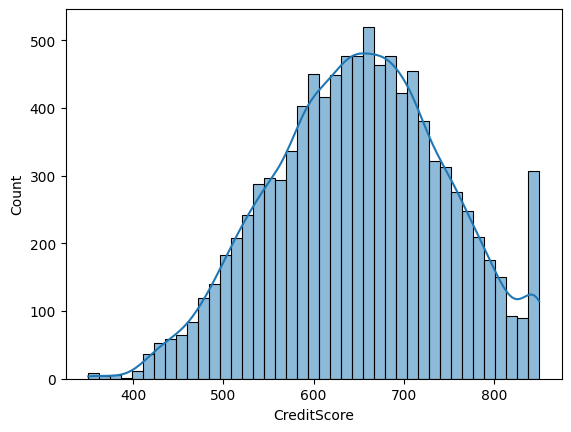

In [13]:
sns.histplot(df['CreditScore'], kde=True)

<Axes: xlabel='CreditScore'>

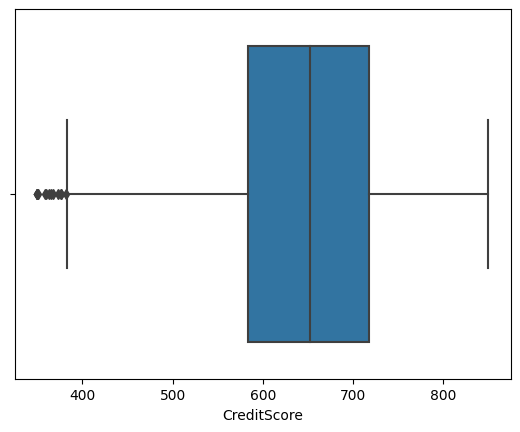

In [14]:
sns.boxplot(x=df['CreditScore'])

In [15]:
df['CreditScore'].skew()

-0.07160660820092679

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

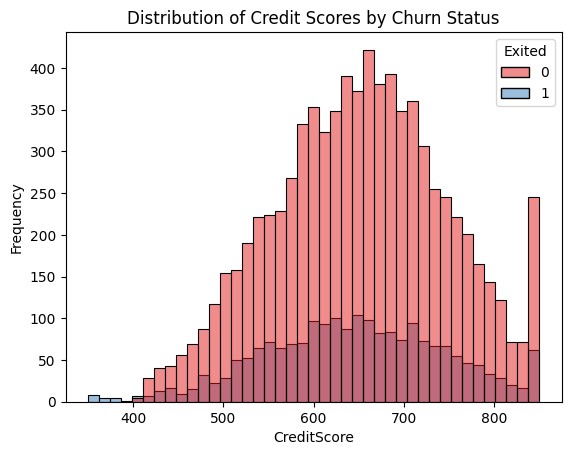

In [16]:
sns.histplot(data=df, x='CreditScore', hue='Exited', palette='Set1', kde=False)

plt.title('Distribution of Credit Scores by Churn Status')
plt.xlabel('CreditScore')
plt.ylabel('Frequency')
plt.show()

*** Notes(Credit Score)******
* **Distribution**: The distribution of credit scores is slightly left-skewed, as shown by the histogram and skewness value.
* **Outliers**: Boxplot reveals a few low-end outliers, which might require handling during preprocessing.
* **Churn Insight**: The histogram shows that customers with lower credit scores are more likely to churn, as evident from the Exited hue distinction.

**6.2 Age Analysis**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

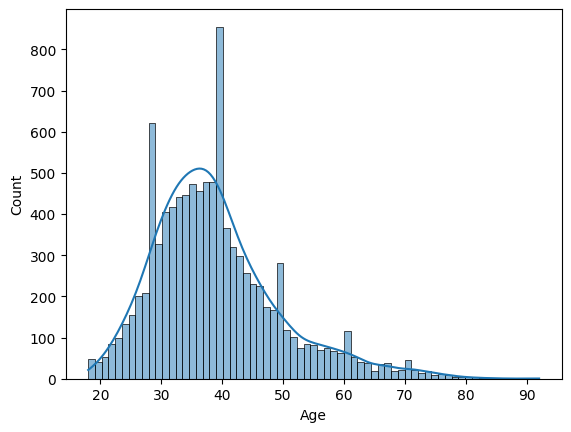

In [17]:
sns.histplot(df['Age'], kde=True)

<Axes: xlabel='Age'>

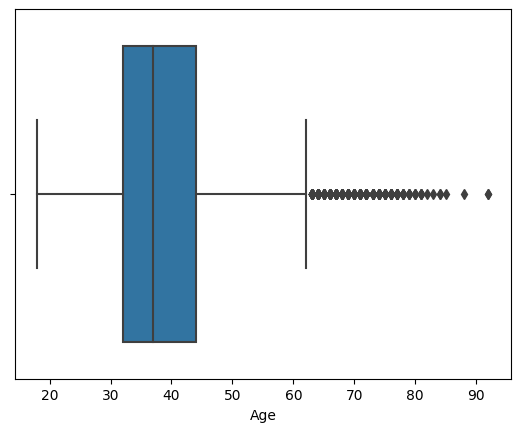

In [18]:
sns.boxplot(x=df['Age'])

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

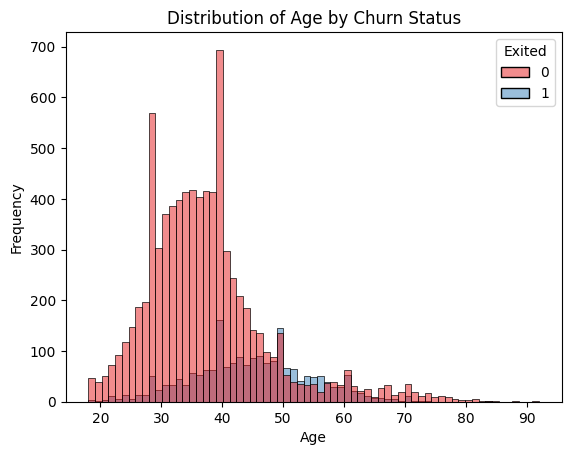

In [19]:
sns.histplot(data=df, x='Age', hue='Exited', palette='Set1', kde=False)

plt.title('Distribution of Age by Churn Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [20]:
df['Age'].skew()

1.0113202630234552

* **Distribution**: The age distribution is right-skewed, as indicated by the histogram and skewness value.
* **Outliers**: Boxplot reveals potential high-end outliers, particularly older customers. These might need further investigation.
* **Churn Insight**: The histogram with the Exited hue indicates that older customers are more likely to churn, as their frequency in the churn category is noticeably higher.

**6.3 Tenure Analysis**

In [21]:
pd.crosstab(df['Tenure'], df['Exited'], normalize='index') * 100

Exited,0,1
Tenure,,
0,76.997579,23.002421
1,77.584541,22.415459
2,80.820611,19.179389
3,78.889990,21.110010
4,79.474216,20.525784
5,79.347826,20.652174
6,79.731127,20.268873
7,82.782101,17.217899
8,80.780488,19.219512


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

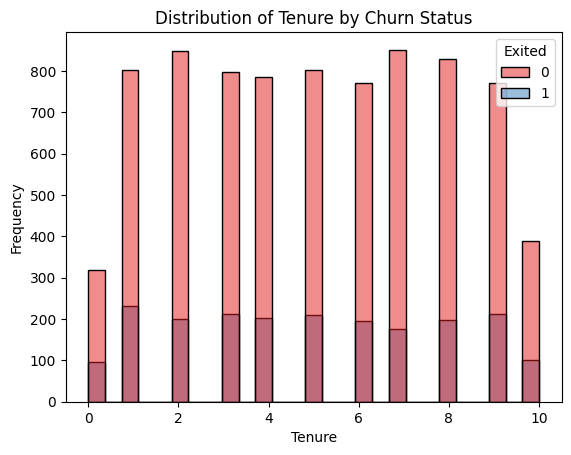

In [22]:
sns.histplot(data=df, x='Tenure', hue='Exited', palette='Set1', kde=False)

plt.title('Distribution of Tenure by Churn Status')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

* **Distribution**: The histogram shows the distribution of tenure across customers. Tenure is more evenly spread compared to other numerical features.
* **Churn Insight**: The crosstab analysis (normalized by index) reveals that customers with shorter tenure (1–3 years) have a higher churn rate, while customers with longer tenure tend to stay.
* **Visualization Insight**: The histogram with the Exited hue visually confirms this trend, with a noticeable concentration of churn in the lower tenure range.

**6.4 Balance Analysis**

In [23]:
df['Balance'].skew()

-0.14110871094154379

<Axes: xlabel='Balance'>

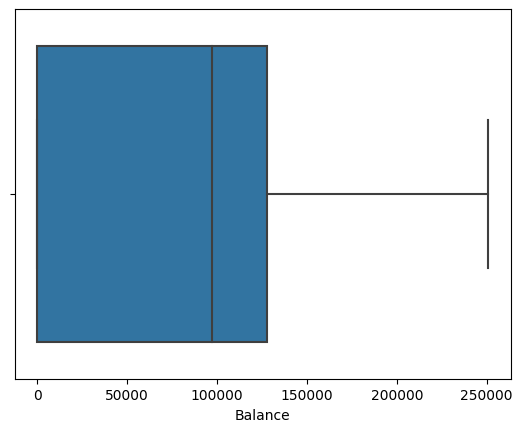

In [24]:
sns.boxplot(x=df['Balance'])

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


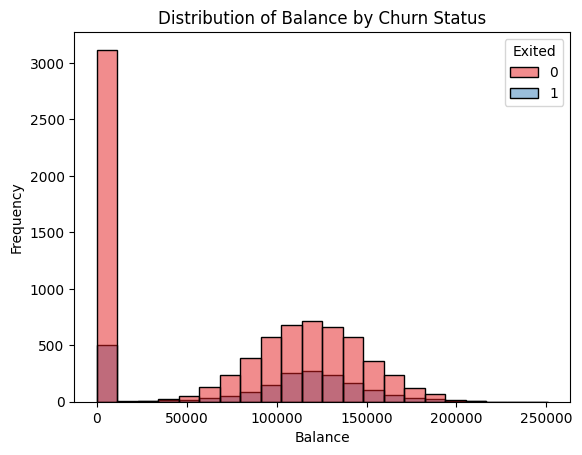

In [25]:
sns.histplot(data=df, x='Balance', hue='Exited', palette='Set1', kde=False)

plt.title('Distribution of Balance by Churn Status')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

* **Distribution**: Balance distribution is right-skewed, meaning more customers have lower balances.
* **Outliers**: The boxplot indicates the presence of some extreme values, which might need handling.
* **Churn Insight**: The histogram suggests that customers with zero balance are less likely to churn, while those with mid-range balances have a higher churn rate.

**6.5 Number of Products Analysis**

In [26]:
df['NumOfProducts'].unique()

array([1, 3, 2, 4])

In [27]:
df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [28]:
df['NumOfProducts'].value_counts(normalize=True) * 100

NumOfProducts
1    50.84
2    45.90
3     2.66
4     0.60
Name: proportion, dtype: float64

In [29]:
pd.crosstab(df['NumOfProducts'], df['Exited'], normalize='index') * 100

Exited,0,1
NumOfProducts,,
1,72.285602,27.714398
2,92.418301,7.581699
3,17.293233,82.706767
4,0.000000,100.000000


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

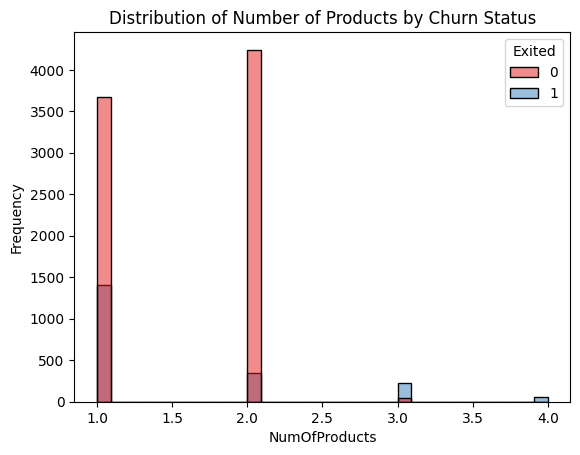

In [30]:
sns.histplot(data=df, x='NumOfProducts', hue='Exited', palette='Set1', kde=False)

plt.title('Distribution of Number of Products by Churn Status')
plt.xlabel('NumOfProducts')
plt.ylabel('Frequency')
plt.show()

* **Unique Values**: Customers have between 1 and 4 products.
* **Distribution**: Most customers have 1 or 2 products, with very few having 3 or 4.
* **Churn Insight**: The crosstab and histogram reveal that customers with 3 or more products have a significantly higher churn rate, while those with 1 product are relatively stable.

**6.6 Credit Card Analysis**

In [31]:
df['HasCrCard'].value_counts(normalize=True) * 100

HasCrCard
1    70.55
0    29.45
Name: proportion, dtype: float64

In [32]:
pd.crosstab(df['HasCrCard'], df['Exited'], normalize='index') * 100

Exited,0,1
HasCrCard,,
0,79.185059,20.814941
1,79.815734,20.184266


**Distribution**: Around 70% of customers own a credit card.
**Churn Insight**: The crosstab shows that credit card ownership does not significantly impact churn, suggesting this feature may not be highly predictive.

**6.7 Active Membership Analysis**

In [33]:
df['IsActiveMember'].value_counts(normalize=True) * 100

IsActiveMember
1    51.51
0    48.49
Name: proportion, dtype: float64

In [34]:
pd.crosstab(df['IsActiveMember'], df['Exited'], normalize='index') * 100

Exited,0,1
IsActiveMember,,
0,73.149103,26.850897
1,85.730926,14.269074


**Distribution**: Around 51% of customers are active members.
**Churn Insight**: Active members are less likely to churn, while inactive members show a higher churn percentage, making this a strong predictor.

**6.8 Estimated Salary Analysis**


In [35]:
df['EstimatedSalary'].skew()

0.002085357661558514

<Axes: xlabel='EstimatedSalary'>

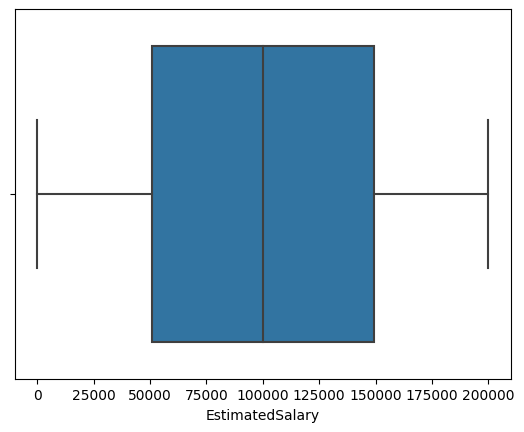

In [36]:
sns.boxplot(x=df['EstimatedSalary'])

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


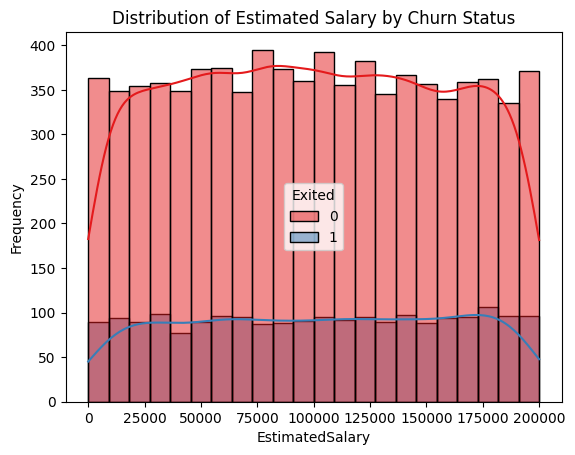

In [37]:
sns.histplot(data=df, x='EstimatedSalary', hue='Exited', palette='Set1', kde=True)

plt.title('Distribution of Estimated Salary by Churn Status')
plt.xlabel('EstimatedSalary')
plt.ylabel('Frequency')
plt.show()

* **Distribution**: The salary distribution is fairly uniform with little skewness.
* **Outliers**: No significant outliers detected.
* **Churn Insight**: The histogram shows no clear relationship between salary and churn, suggesting limited predictive power.

# 7. Working on Categorical Columns
In this section, we analyze the categorical features to understand their distribution and impact on churn.

**7.1 Geography Analysis**

<Axes: ylabel='count'>

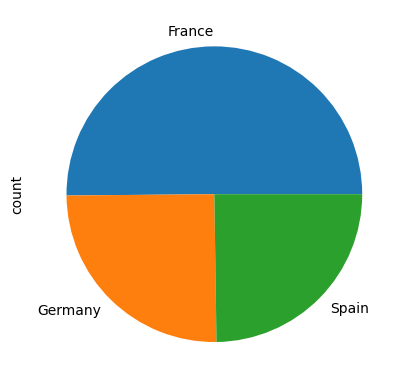

In [38]:
df['Geography'].value_counts().plot(kind='pie')

In [39]:
pd.crosstab(df['Geography'], df['Exited'], normalize='index') * 100

Exited,0,1
Geography,,
France,83.845233,16.154767
Germany,67.556796,32.443204
Spain,83.326605,16.673395


**Distribution**: The majority of customers are from France, followed by Germany and Spain.
**Churn Insight**: The crosstab reveals that Germany has the highest churn rate, while France has the lowest. This suggests that customer behavior varies by location, making geography an important predictor.

**7.2 Gender Analysis**

<Axes: ylabel='count'>

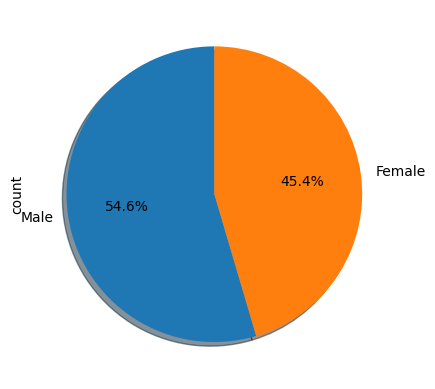

In [40]:
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True)

In [41]:
pd.crosstab(df['Exited'], df['Gender'], normalize='index') * 100

Gender,Female,Male
Exited,,
0,42.747708,57.252292
1,55.915562,44.084438


**Distribution**: The dataset has slightly more male customers than female.
**Churn Insight**: The crosstab shows that female customers have a higher churn rate compared to males. This suggests that gender may have some influence on churn behavior.

# 8. Data Preprocessing
In this section, we prepare the dataset for model training by encoding categorical variables, scaling numerical features, and splitting the data into training and test sets.

**8.1 Encoding Categorical Variables**

In [42]:
df = pd.get_dummies(df, columns=['Geography'], drop_first=False)

In [43]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

* Used one-hot encoding on the Geography column without dropping a category (drop_first=False), ensuring the model has all country information.
* Mapped Gender to 0 for Male and 1 for Female to convert it into a numerical format.

**8.2 Feature Scaling**

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

* Applied StandardScaler to scale numerical columns:   CreditScore, Age, Tenure, Balance, NumOfProducts, and EstimatedSalary.
* Standardization ensures all features have a mean of 0 and standard deviation of 1, improving model performance.

**8.3 Splitting Data for Training and Testing**

In [45]:
from sklearn.model_selection import train_test_split
X = df.drop('Exited', axis=1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* Separated features (X) from the target variable (y → Exited).
* Used train-test split (80% train, 20% test) to evaluate the model on unseen data.
* Set random_state=42 for reproducibility.

# 9. Model Building & Evaluation
In this section, we train multiple classification models and evaluate their performance to identify the best one for predicting customer churn.

**9.1 Models Used**
machine learning models to be used:

* Logistic Regression
* Decision Tree Classifier
* Support Vector Classifier (SVC)
* K-Nearest Neighbors (KNN)
* Gradient Boosting Classifier

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Classifier": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
}

Each model was fitted on the training data and evaluated using various metrics.

**9.2 Evaluation Metrics**
For each model, I will measure:

* Accuracy: The percentage of correct predictions.
* Classification Report: Precision, Recall, F1-score for both churned and non-churned customers.
* Confusion Matrix: Breakdown of True Positives, True Negatives, False Positives, and False Negatives.
* ROC AUC Score: Measures model discrimination between churned and non-churned customers.

In [47]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy * 100:.2f}%")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
    print('-' * 15)

Logistic Regression Accuracy: 81.15%
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.56      0.20      0.30       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Confusion Matrix:
 [[1544   63]
 [ 314   79]]
ROC AUC Score: 0.7789394680714622
---------------
Decision Tree Accuracy: 77.90%
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.45      0.51      0.48       393

    accuracy                           0.78      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg       0.79      0.78      0.78      2000

Confusion Matrix:
 [[1358  249]
 [ 193  200]]
ROC AUC Score: 0.6769793730039222
---------------
Support Vector Classifier Accuracy: 86.05%
              precision    recall  f1-score

In [48]:
y_train_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_train_pred)
print(accuracy)
print(classification_report(y_train, y_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))

0.874
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      6356
           1       0.82      0.50      0.62      1644

    accuracy                           0.87      8000
   macro avg       0.85      0.74      0.77      8000
weighted avg       0.87      0.87      0.86      8000

Confusion Matrix:
 [[6171  185]
 [ 823  821]]
